In [ ]:
from IPython.display import display, Math, Latex 

Lecture 3.3 Polynomial regression.

#Polynomial regression

This colab implements polynomial regression from scratch with basic python libraties like `numpy`. Recall that polynomial regression is linear regression wtih  an additional step of polynomial transformation.
    
    Features --> polynomial transformation --> Linear regression --> Label
we will use `LinReg` class that implements linear regression model.
We will implement:
* Polynomial transformation function.

A few helper function for 
* Generation of training data with non-linear relationship between features and labels. We generate examples with single features $x_1$ and label $y$.
* Visualization of training data and model fitment.

We use polynomial transformations of different degress for modeling realtionship between input features and labels.Each degree results in a new polynomial model. Thus, we have multiple polynomial models from which we need to select the best performing model. We have implemented the model selection scheme towards the end of this colab.


In [ ]:
import numpy as np
from numpy import linalg as lg
from IPython.display import display, Math, Latex # Imported for proper rendering of latex in colab.
import numpy as np
# Import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Let's combine implementation of different components of Linear Regression that we implemented so far into a single `LinearRegression` class.


In [ ]:
class LinReg(object):
  '''
  Linear regression model 
  -----------------------
  y=X@w 
  X: A feature matrix 
  w: weight vector
  y: label vector

  ''' 

  def __init__(self):
    self.t0=200 
    self.t1=100_000 

  def predict(self, X:np.ndarray)->np.ndarray: 
    '''
    Prediction of output label for a given input.

    Args: 
    X: Feature matrix for given inputs.
    
    Returns:
    y: Output label vector as predicted by the given model

    '''
    y = X@self.w 
    return y

  def loss(self, X:np.ndarray, y:np.ndarray)->float: 
    ''' 
    Calculates loss for a model based on known labels:

    Args: 
    X: Feature matrix for given inputs.
    Returns:
    y: Output label vector as predicted by the given model
    
    Returns:
    y: Output label vector as predicted by the given model


    ''' 
    e = self.predict(x) -y 
    
    return (1/2) * (np.transpose(e)@e) 

  def rmse(self, X:np.ndarray, y:np.ndarray)->float:
    '''

    Calculates root mean squared error of prediction w.r.t. actual label:

    Args: 
    X: Feature matrix for given inputs.
    Returns:
    y: Output label vector as predicted by the given model
    
    Returns:
    rmse 
    '''
    return np.sqrt(2/X.shape[0] * self.loss(X,y))

  def fit(self, X:np.ndarray, y:np.ndarray)->np.ndarray:
    '''' 
    Estimates parameters of the linear regression model with normal equation.

    Args:
      X: Feature matrix for given inputs 
      y: output label vector as predicted by the given model

    Returns:
      weight vector 
    ''' 
    self.w = np.linalg.pinv(X)@y 

  def calculate_gradient(self,X:np.ndarray, y:np.ndarray )-> np.ndarray:
    ''' 
    calculates gradients of loss function w.r.t weight vector on training set.

       return A vector of gradient .
    '''

    return np.transpose(X)@(self.predict(X)-y) 

  def update_weight(self, grad:np.ndarray, lr: float)->np.ndarray:

    returns (self.w -lr*grad)


  def learning_schedule(self,t):
     return self.t0/(t+self.t1) 

  def gd(self, X: np.ndarray, y: np.ndarray,num_epochs:int,lr:float)->np.ndarray:
    self.w = np.zeros(X.shape[1])
    self.w_all = [] 
    self.err_all = [] 
    for i in np.arange(0,num_epochs):
      djdw = self.calculate_gradient(X,y)
      self.w_all.append(w)
      self.err_all.append(self.loss(X,y))
      self.w = self.update_weights(djdw ,lr) 
    return self.w

#polynomial transformation

Steps for generating polynomial transformation of degree *M*.
1. Generate combination of input features of lengths $= 0,1,\ldots, \textit M.$
2. Perform multiplication operation between features to obtain the new features.


For example:
* For a single feature $x_1$ $ \phi_m = [1,x_1^1,x_1^2, \ldots , x_1^m]$
  * Generate combinations of $\{1,x_1,(x_1,x_1), (x_1,x_1,x_1),\ldots, (x_1,x_1), \ldots, (m times)\}$
    * 0-th degree: 1
    * 1st degree: $x_1$
    * 2nd degree: $x_1,x_1$
    * 3rd degree: $x_1,x_1,x_1$
    * mth degree:$(x_1,x_1,x_1,\ldots ,m \ times)$
  * Taking the product of elements in combination:
  

In [ ]:
import itertools 
import functools 
def get_combinations(X, degree):
  return itertools.combinations_with_replacement(X,degree)
def compute_new_feature(items):
  return functools.reduce(lambda x ,y : x*y , items)


In [ ]:
import numpy as np
char_lst = []
for i in range(0,4):
  a = (get_combinations(['a','b'],i))
    
  #print((tuple(a)))
  
  for tuple in a:
    temp=''
    for char in tuple:
      temp+=char
    char_lst.append(temp)
print(len(char_lst))

10


In [ ]:
len({item: compute_new_feature(item) for item in get_combinations([1,2,3,4,5],4)})

70

In [ ]:
x = np.array([1,2,3,4,5])
print(x.ndim)
print(x)
if x.ndim ==1:
  x= x[: , None]
print(x)

1
[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
features = np.array([np.ones(4)])
features= features[:, None]
features

array([[[1., 1., 1., 1.]]])

In [ ]:
import itertools 
import functools 
import numpy as np 
def polynomial_transform(x,degree):
  if x.ndim ==1:
    x=x[:, None]
  x_t = x.transpose()
  features = [np.ones(len(x))]
  for degree in range(1, degree+1):
    for items in itertools.combinations_with_replacement(x_t ,degree):
      features.append(functools.reduce(lambda x ,y : x*y , items)) 
  return np.asarray(features).transpose() 

polynomial_transform(np.array([[1,8],[5,2],[2,0]]),2)




array([[ 1.,  1.,  8.,  1.,  8., 64.],
       [ 1.,  5.,  2., 25., 10.,  4.],
       [ 1.,  2.,  0.,  4.,  0.,  0.]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def create_nonlin_training_set(func, sample_size,std):
  x = np.linspace(0,1,sample_size)
  y = func(x) + np.random.normal(scale=std, size = x.shape)
  return x,y

def nonlin(x):
  return np.sin(2*np.pi*x)



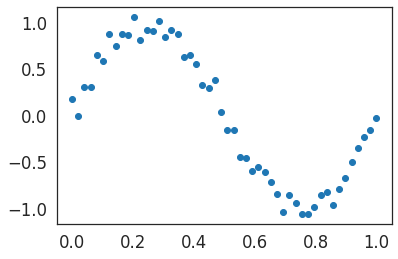

In [ ]:
x ,y = create_nonlin_training_set(nonlin,50,0.1)

plt.scatter(x,y)


In [ ]:
x = np.array([[1,2,3],[3,2,4]])
y=np.array([[2],[4]])
w = np.array([[0.1],[-0.2],[0.3]])
0.5*np.dot((x@w-y).transpose(),(x@w-y))+(0.1/2)*np.dot(w.T,w)

array([[5.192]])

In [ ]:
x = np.array([[1,2,3],[3,2,4]])
y=np.array([[2],[4]])
w = np.array([[0.01],[-0.5],[0]])
0.5*np.dot((x@w-y).transpose(),(x@w-y))+(0.1/2)*np.linalg.norm(w,1)

array([[16.846]])

In [ ]:
x=np.array([[1,2,3],[4,5,6]])
w=np.array([[1],[5],[4],[8]])
one=np.ones(len(x))
x_new=np.column_stack((one,x))
x_new@w

array([[38.],
       [89.]])

In [ ]:
def polynomial_transform(x,degree):
  if x.ndim ==1:
    x=x[:, None]
  x_t = x.transpose()
  features = [np.ones(len(x))]
  for degree in range(1, degree+1):
    for items in itertools.combinations_with_replacement(x_t ,degree):
      features.append(functools.reduce(lambda x ,y : x*y , items)) 
  return np.asarray(features).transpose() 

def coef(X,y):
  return np.linalg.pinv(X)@y
def model_error(X,y,degree):
  X_transformed = polynomial_transform(X,degree) 
  w = coef(X_transformed,y)
  e = X_transformed@w -y
  return np.sqrt(1/X_transformed.shape[0] * e.T@e) 

  
  

#coef(np.array([[1,2,3],[4,6,8]]),np.array([[2],[3]]))

'''
x=np.array([[1,2,3],[4,5,6]])
y=np.array([[2],[8]])
model_error(x,y,2)'''

'\nx=np.array([[1,2,3],[4,5,6]])\ny=np.array([[2],[8]])\nmodel_error(x,y,2)'

In [ ]:
import numpy as np
def additional_vector(X):
  add_vec=[]
  for i in range(4):
    if (i+1)%2==0:
      add_vec.append(1)
    else: add_vec.append(0)
  return np.column_stack((add_vec,X))



In [ ]:
a=([[1,2,3],[4,5,6],[9,0,1]])
b=[1,1,1]
np.column_stack((a,b))


array([[1, 2, 3, 1],
       [4, 5, 6, 1],
       [9, 0, 1, 1]])

#**WEEK 4** contents begins here...


---



---



In [ ]:
# Optimization through normal equation.

def fit(X,y):
  return np.linalg.pinv(X)@y 

#inference 
def predict(X,w):
  z = X @ w 
  return np.array([1 if z_val > 0 else 0 for z_val in z]) 

##Least square classifier from scratch 

#Background 

We will implement least square classificaiton from scratch in this colab 

A few points to recall from the theory:

* Least square classification is used for estimating parameters of discriminant function from the given training data.
* Least square classification adapts linear regression model for classification.
 * It uses **least square error** as a **loss funciton**
 * It uses **normal equation** method and **gradient descent** for estimating model parameters or weight vector.
* Since it is a classification algorithm, we would use classification related evaluation metrics such as precision, recall, F-1 score ,AUC ROC/PR, and accuracy.

Additionally note that: 
* We make use of polynomial feature transformation to obtain new features and then use that representation to learn non-linear decision boundaries between classes.

\begin{equation} y= w_0 + \mathbf w^T \phi\mathbf(x) \end{equation} 

where, $ \phi(\mathbf x)$ is a polynomial feature transformation.

* we can tackle issues of overfitting by using ridge or lasso regularizaiton just like linear regression model.


#Label encoding 

since the output $y$ is a discrete quantity, we use one-hot encoding to represent label. For a **binary classification** 
* The label$0$ is represented with $[1,0]$, and 
* The label $1$ is represented with $[0,1]$.

The same scheme is extended to the **multi-class setting**. In general for a $k$ class set up, we use one hot encoding in $k$ components vector. $[y_1,y_2,\ldots, y_k]$ for label $1 \le r \le k, y_r$ would be 1 and other components would be 0.

concretely for a three class classification set up,
* The label $0$ is represented with $[1,0,0]$
* The label $1$ is represented with $[0,1,0]$
* The label $2$ is represented with $[0,0,1]$

IN the following class, we implement, LabelTransformer, that converts discrete label into `one hot encoding`. We are using this implementation from 


[PRML ](https://github.com/ctgk/PRML/blob/8f8270cbae986c607f3cc6f89afefd58fa69fadd/notebooks/ch03_Linear_Models_for_Regression.ipynb
)

In [ ]:
class LabelTransformer(object):
  """ Label encoder decoder 
  Atrributes
  ----------
  n_classes : int 
    number of classes, K
  
  """
  def __init__(self,n_classes:int=None):
    self.n_classes=n_classes 


  @property 
  def n_classes(self):
    return self.__n_classes 


  @n_classes.setter
  def n_classes(self,K):
    self.__n_classes =K 
    self.__encoder =None if K is None else np.eye(K) 
  
  @property 
  def encoder(self):
    return self.__encoder
  
  def encode(self, class_indices:np.ndarray):
    """
    encode class index into one-of-k code 
    Parameters
    ----------
    class_indices : (N,) np.ndarray 
        non-negative class index 
        elements must be integer in [0, n_classes]


    Returns : 
    -------
    (N,K) np.ndarray 
        one-of-K encoding of input 

     """
    if self.n_classes is None: 
        self.n_classes = np.max(class_indices) + 1 
     
    return self.encoder[class_indices] 
  
  def decode(self,onehot:np.ndarray):
    """
    decode one-of-k code into class index 
    parameters
    ----------
    onehot :(N,K) np.ndarray   
    Returns:
    -------
    (N,) np.ndarray 
        class index 
    """
    return np.argmax(onehot, axis=1) 



#Let's demonstrate the `LabelTransformer` with the couple of examples.

Binary classification set up: 


In [ ]:
binary_labels = LabelTransformer(2).encode(np.array([1,0,1,0]))
binary_labels 



array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Multiclass set up with three classes: 


In [ ]:
multiclass_labels =LabelTransformer(3).encode(np.array([1,0,1,2])) 
multiclass_labels



array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#Least square classification implementation

>Training data  

> This representation of label has an impact on the learning set up. Now we have
* A feature matrix $\mathbf X$ of shape $(n,m)$ wher $n$ is the number of examples, $m$ is the number of features.
* A label matrix $\mathbf Y$ of shape $(n,k)$ where $k$ is number of class labels. Note that this set up is similar to multiple regression.

Model

The label matrix is obtained by matrix multiplication of feature matrix and weight **matrix**. After adding a dummy feature of the feature matrix, its shape becomes $n\times(m+1)$.

\begin{equation}  \mathbf Y_{n \times k} =  \mathbf X_{n \times (m+1)} \mathbf W_{(m+1) \times k} \end{equation} 

There is one weight vector per output. Hence the total number of parameters to be estimated = $(m+1) \times k$ 


## Loss function

This results into the following loss matrix of shape $(k,k)$. 
\begin{eqnarray}  J(\mathbf W) &=&\frac{1}{2} (\mathbf Y_{n \times k} - \mathbf X_{n \times (m+1)} \mathbf W_{(m+1) \times k})^T(\mathbf Y_{n \times k} - \mathbf X_{n \times (m+1)} \mathbf W_{(m+1) \times k}) + \frac{\lambda}{2} \mathbf W^T \mathbf W \\ &=& \frac{1}{2} (\mathbf E^T)_{k \times n}\mathbf E_{n\times k} + \frac{\lambda}{2} \left(\frac{\lambda}{2} \mathbf W^TW \right)_{k \times k} \end{eqnarray}


# Normal equation
There is almost no code change needed in `fit` function that uses normal equation method for parameter or weight vector estimation: 
\begin{equation} \mathbf W = \left(\mathbf X^TX +  {\color {blue} \lambda}\mathbf {\color {blue} I } \right)^{-1} \mathbf {X^TY}  \end{equation} 

#Iterative optimization (GD,MBGD and SGD) 

The gradient calculation (`calculate_gradient`) for iterative optimization is performed as follows: 
\begin{equation} \frac{\partial J(\mathbf W)}{\partial \mathbf W} = \mathbf{X^T(XW-Y) + {\color {green}{\lambda W}}} \end{equation} 

And the new value of $\mathbf W$ is calculated in vectorized form:

\begin{equation} {\color{red} {\mathbf {W^{new} := W^{old} -\alpha \frac{\partial J (W)}{\partial W}} }} \end{equation}

Inference 

The `predict` funciton for this classification set up is expected to return a discrete quantity (unlike a real number in regression set up) 
* We return the class label with the largest value of linear combination of features among all classes.

#Works for multi-class classification 
> All other functions are adapted from ridge regression and multiple regression colabs.

This implementation is generic enough to work on multi-class set up and also polynomial transformation followed by the least squares classification.



In [ ]:
import numpy as np
class LeastSquareClassification(object): 

  """ LSC model
  ------------------------------
  y = np.where(X#w >=0, 1, 0)
  X: A feature matrix 
  w: weight vector 
  y: label vector 
 """

  def __init__(self): 
    self.t0 = 20 
    self.t1 = 1000
  

  def predict(self, X:np.ndarray):
    """ Prediction of output label for a given input.

    Args: 
        X: Feature matrix for given inputs

    Returns: 

    y: Output labels vector as predicted by the given model.


    
    """
    #Check to make sure that the shapes are compatible.

    assert X.shape[-1]== self.w.shape[0], f"X shape{X.shape} and w shape {self.w.shape}, are not compatible"
    return np.argmax( X@ self.w, axis=-1) #returns the highest value of linear combination of features 

  def loss(self, X:np.ndarray,y:np.ndarray, reg_rate:float):
    e =y - self.predict(X) 
    return (1/2)* (e.T@e) + (reg_rate/2)*(self.w).T@(self.w)

    

  def predict_internal (self, x:np.ndarray): 
     """
     prediction of output label for a given input. 

     Args: 
     X: Feature matrix for given inputs

     Returns: 
     y: Output label vector encoded in label encoder format.

     """
     #Check to make sure that the shapes are compatible.
     assert X.shape[-1] == self.w.shape[0], f"X shape {X.shape} and w shape {self.w.shape}, are not compatible"
     return X@self.w  
  
  def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float):

    """  Calculate loss for a model based on known labels 
    Args:
       X: Feature matrix for given inputs.
       y: Output label vector as predicted by the given model.
       """
    e = self.predict(x) -y 
    return (1/2) * (np.transpose(e)@e) 

  def rmse(self, X:np.ndarray, y:np.ndarray)->float:
    '''

    Calculates root mean squared error of prediction w.r.t. actual label:

    Args: 
    X: Feature matrix for given inputs.
    Returns:
    y: Output label vector as predicted by the given model
    
    Returns:
    rmse 
    '''
    return np.sqrt(2/X.shape[0] * self.loss(X,y))

  def fit(self, X:np.ndarray, y:np.ndarray,reg_rate:float):
    '''' 
    Estimates parameters of the linear regression model with normal equation.

    Args:
      X: Feature matrix for given inputs 
      y: output label vector as predicted by the given model

    Returns:
      weight vector 
    ''' 
    self.w = np.linalg.pinv(X)@y 

  def calculate_gradient(self,X:np.ndarray, y:np.ndarray )-> np.ndarray:
    ''' 
    calculates gradients of loss function w.r.t weight vector on training set.

       return A vector of gradient .
    '''

    return np.transpose(X)@(self.predict(X)-y) 

  def update_weight(self, grad:np.ndarray, lr: float)->np.ndarray:

    returns (self.w -lr*grad)


  def learning_schedule(self,t):
     return self.t0/(t+self.t1) 

  def gd(self, X: np.ndarray, y: np.ndarray,num_epochs:int,lr:float)->np.ndarray:
    self.w = np.zeros(X.shape[1])
    self.w_all = [] 
    self.err_all = [] 
    for i in np.arange(0,num_epochs):
      djdw = self.calculate_gradient(X,y)
      self.w_all.append(w)
      self.err_all.append(self.loss(X,y))
      self.w = self.update_weights(djdw ,lr) 
    return self.w





In [ ]:
import numpy as np
class LeastSquareClassification(object): 

  """ LSC model
  ------------------------------
  y = np.where(X#w >=0, 1, 0)
  X: A feature matrix 
  w: weight vector 
  y: label vector 
 """

  def __init__(self): 
    self.t0 = 20 
    self.t1 = 1000
  

  def predict(self, X:np.ndarray):
    """ Prediction of output label for a given input.

    Args: 
        X: Feature matrix for given inputs

    Returns: 

    y: Output labels vector as predicted by the given model.


    
    """
    #Check to make sure that the shapes are compatible.

    assert X.shape[-1]== self.w.shape[0], f"X shape{X.shape} and w shape {self.w.shape}, are not compatible"
    return np.argmax( X@ self.w, axis=-1)

  def loss(self, X:np.ndarray,y:np.ndarray, reg_rate:float):
    """  Calculate loss for a model based on known labels 
    Args:
       X: Feature matrix for given inputs.
       y: Output label vector as predicted by the given model.
       """
    
    e =y - self.predict_internal(X) 
    return (1/2)* (e.T@e) + (reg_rate/2)*(self.w).T@(self.w)



  def predict_internal (self, x:np.ndarray): 
     """
     prediction of output label for a given input. 

     Args: 
     X: Feature matrix for given inputs

     Returns: 
     y: Output label vector encoded in label encoder format.

     """
     #Check to make sure that the shapes are compatible.
     assert X.shape[-1] == self.w.shape[0], f"X shape {X.shape} and w shape {self.w.shape}, are not compatible"
     return X@self.w  
  
  
  def rmse(self, X:np.ndarray, y:np.ndarray)->float:
    '''

    Calculates root mean squared error of prediction w.r.t. actual label:

    Args: 
    X: Feature matrix for given inputs.
    Returns:
    y: Output label vector as predicted by the given model
    
    Returns:
    rmse 
    '''
    return np.sqrt(2/X.shape[0] * self.loss(X,y,0))

  def fit(self, X:np.ndarray, y:np.ndarray,reg_rate:float):
    '''' 
    Estimates parameters of the linear regression model with normal equation.

    Args:
      X: Feature matrix for given inputs 
      y: output label vector as predicted by the given model

    Returns:
      weight vector 
    ''' 

    
    eye = np.eye(X.shape[1])
    self.w = np.linalg.solve(
        reg_rate*eye + X.T@X, X.T@ y
    )
    return self.w

  def calculate_gradient(self,X:np.ndarray, y:np.ndarray,reg_rate)-> np.ndarray:
    ''' 
    calculates gradients of loss function w.r.t weight vector on training set.

       return A vector of gradient .
    '''
    grad = X.T @  (self.predict_internal(X)-y) + reg_rate * self.w

    return  grad

  def update_weight(self, grad:np.ndarray, lr: float)->np.ndarray:
    

    returns (self.w -lr*grad)


  def learning_schedule(self,t):
     return self.t0/(t+self.t1) 

  def gd(self, X: np.ndarray, y: np.ndarray,num_epochs:int,lr:float,reg_rate:float)->np.ndarray:
    self.w = np.zeros(X.shape[1])
    self.w_all = [] 
    self.err_all = [] 
    for i in np.arange(0,num_epochs):
      djdw = self.calculate_gradient(X,y,reg_rate)
      lr = self.learning_schedule(epoch*X.shape[0]+i)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,reg_rate))
      self.w = self.update_weights(djdw ,lr) 
    return self.w
    

In [ ]:
#@title Rohit code
class LeastSquareClassification(object):
  '''
  LSC Model
  ----------------
  y=np.where(X@w>=0,1,0)
  X: A feature matrix
  w: weight vector
  y: label vector
  '''
  def __init__(self):
    self.t0=20
    self.t1=1000
  
  def predict(self,X:np.ndarray)->np.ndarray:
    '''
    Prediction of output label for a given input.

    Args:
      X: Feature matrix for given inputs.

    Returns:
      y: Output label vector as predicted by the given model.
    '''
    #check to make sure that the shape are compatible.
    assert X.shape[-1]==self.w.shape[0], f'X shape {X.shape} and shape {self.w.shape}, are not compatible'
    return np.argmax(X@self.w,axis=-1)

  def predict_internal(self,X:np.ndarray) -> np.ndarray:
    '''Predication of putput label for a given input.
    Args:
    X: Feature matrix for given inputs.

    Returns:
    y: Output label vector encoded in label encoder format.
    '''
    #check to make sure that the shapes are compatible.
    assert X.shape[-1]==self.w.shape[0],f'X shape {X.shape} and w shape{self.w.shape}, are not compatible'
    return X@self.w
  
  def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->float:
    y_hat=self.predict_internal(X)
    assert y_hat.shape==y.shape, f'Predicted label shape {y_hat.shape} and Actual label shape {y.shape}, are not compatible'
    err=y_hat-y
    return (1/2)*(err.T@err)+(reg_rate/2)*(self.w.T@self.w)

  def fit(self,X:np.ndarray,y:np.ndarray,reg_rate:float=0)-> np.ndarray:
    self.w=np.linalg.solve(X.T@X+reg_rate*np.eye(X.shape[-1]),X.T@y)
    return self.w
  
  def calculate_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
    y_hat=self.predict_internal(X)
    return X.T@(y_hat-y) + reg_rate*self.w
  
  def weight_updates(self, grad:np.array,lr:float)-> np.ndarray:
    return (self.w-lr*grad)
  
  def learning_schedule(self,t):
    return self.t0/(t+self.t1)
  
  def gd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,lr:float,reg_rate:float)->np.ndarray:
    self.w=np.zeros((X.shape[-1],y.shape[-1]))
    self.w_all=[]
    self.err_all=[]
    for i in np.arange(0,num_epochs):
      djdw=self.calculate_gradient(X,y,reg_rate)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,reg_rate))
      self.w = self.weight_updates(djdw,lr)
    return self.w
  
  def sgd(self, X:np.ndarray,y:np.ndarray,num_epochs,reg_rate:float):
    self.err_all=[]
    self.w_all=[]
    self.w=np.zeros((X.shape[-1],y.shape[-1]))
    t=0
    for epoch in range(num_epochs):
      for iter in range(X.shape[0]):
        t=t+1
        random_index=np.random.randint(X.shape[0])
        x1=X[random_index:random_index+1]
        y1=y[random_index:random_index+1]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(x1,y1,reg_rate))

        djdw=self.calculate_gradient(x1,y1,reg_rate)
        self.w=self.weight_updates(djdw,self.learning_schedule(t))
    return self.w

#Demonstration

We will demonstrate working on least square classification in the following set ups:
1. Linearly separable binary classification set up.
2. Linearly separable binary classification set up with a few outlier points.
3. Multi-class classification with $k =3$ 
4. Polynomial least square classification.

Let's create a dataset for binary classification with #samples, $n=50$ 
* It also has facility to add outliers to generated dataset.
* And it can generate samples from multiple classes (>2) 


In [ ]:
##@title Toy dataset creation

def create_toy_data(add_outliers=False, add_class=False):
  x0 = np.random.normal(size=50).reshape(-1,2)-1 
  x1= np.random.normal(size=50).reshape(-1,2) + 1. 
  if add_outliers: 
    x_1  = np.random.normal(size=10).reshape(-1,2) + np.array([5.,10.])
    return np.concatenate([x0,x1,x_1]) , np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int) 

  if add_class: 
    x2 = np.random.normal(size=50).reshape(-1,2) + 2.
    return np.concatenate([x0,x1,x2]), np.concatenate([np.zeros(25), np.ones(25),2 + np.zeros(25)]).astype(np.int)
  return np.concatenate([x0,x1]), np.concatenate([np.zeros(25),np.ones(25)]).astype(np.int) 




First let's define a generic data preprocessing function that
1. Generates synthetic data by calling `create_toy_data` function.
2. Perform polynomial transformation (default degree =1) on feature set.
3. Divide the data into training and evaluation sets with `train_test_split` from `sklearn` library.
4. Performs label transformation for both train and test sets.



In [ ]:
#@title Data Preprocessing 
from sklearn.model_selection import train_test_split 




def preprocess(add_class=False, add_outliers=False, degree=1):
  x ,y = create_toy_data(add_outliers, add_class)
  x_poly = polynomial_transform(x, degree=degree)
  x_train, x_test, y_train,y_test = train_test_split(x_poly, y) 
  y_train_trans = LabelTransformer().encode(y_train)
  y_test_trans = LabelTransformer().encode(y_test)
  return x_train , x_test, y_train, y_test, y_train_trans, y_test_trans 


In [ ]:
import seaborn as sns
#@title Model visualization 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


def visualize_model(X_train, labels, lsc_obj, degree=1):

  f = plt.figure(figsize = (8,8)) 

  #compute xlim and ylim 
  x1_min = np.min(x_train[:,1]) 
  x1_max = np.max(x_train[:,1])
  x2_min = np.min(x_train[:,2])
  x2_max = np.max(x_train[:,2]) 

  x1_test ,x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100),np.linspace(x2_min, x2_max, 100)) 
  x_test = np.array([x1_test, x2_test]).reshape(2,-1).T 
  x_test_poly = polynomial_transform(x_test , degree = degree )
  y_test = lsc_obj.predict(x_test_poly )

  sns.scatterplot(data=X_train, x=X_train[:,1], y =X_train[:,2],hue=labels)
  plt.contourf(x1_test,x2_test, y_test.reshape(100,100),alpha=0.5,levels=np.linspace(0,1,3))

  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)
  plt.gca().set_aspect('equal', adjustable='box')
  return plt.show()


#Demo#1: Linearly separable binary classification 



In [ ]:
x_train , x_test, y_train, y_test, y_train_trans ,y_test_trans = preprocess()


Let's examine the datasets.


In [ ]:
print('shape of training feature matrix:',x_train.shape)
print('shape of label vector', y_train.shape)

print("\nshape of test feature matrix:", x_test.shape)
print("Shape of test label vector:", y_test.shape)

shape of training feature matrix: (37, 3)
shape of label vector (37,)

shape of test feature matrix: (13, 3)
Shape of test label vector: (13,)


Note that the **first dimension of feature matrix and label vector matches** in training and test sets, which is how it should be! 

Next let's visulalize the data:


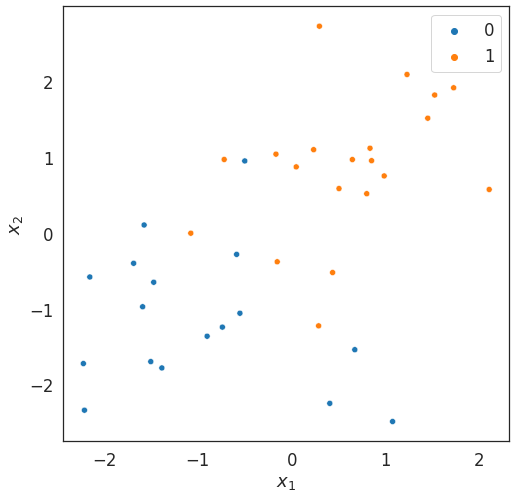

In [ ]:
import matplotlib.pyplot as plt

sns.set_style('white')
f = plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale=1.5, rc={'lines.linewidth': 2.5})

sns.scatterplot(data=x_train, x=x_train[:,-2], y = x_train[:,-1], hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [ ]:
lsc = LeastSquareClassification() 


#Normal equation 
Let's learn the model parameters with normal equation method:


Weight vector: [[ 0.42686317  0.57313683]
 [-0.16322766  0.16322766]
 [-0.19848377  0.19848377]]
(3, 2)


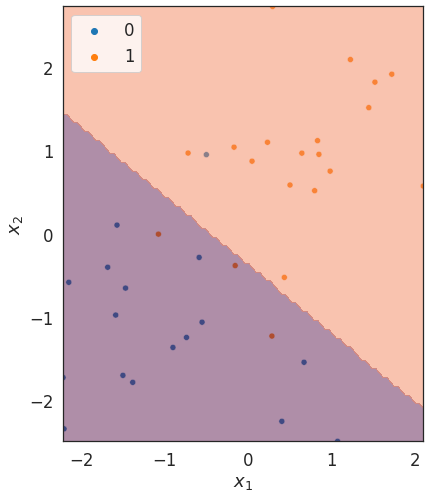

In [ ]:
lsc.fit(x_train, y_train_trans,reg_rate=0)
print('Weight vector:',lsc.w)
print(lsc.w.shape)
visualize_model(x_train, y_train, lsc)

In [ ]:
lsc=LeastSquareClassification()
lsc.gd(x_train,y_train_trans, num_epochs=100, lr=1e-3,reg_rate=0)

array([[ 0.41668279,  0.55806587],
       [-0.16731149,  0.15659043],
       [-0.19631357,  0.20211498]])

In [ ]:
def plot_learning_curve(err_all):
  err = [err[1][1] for err in err_all]
  plt.plot(np.arange(len(err)),err ,'r-')
  plt.xlabel('iter#')
  plt.ylabel('$\mathbf{J(w)}$')


SGD 

Let's train the model with SGD and examine the learning curve.



Let's visualize the decision boundary 

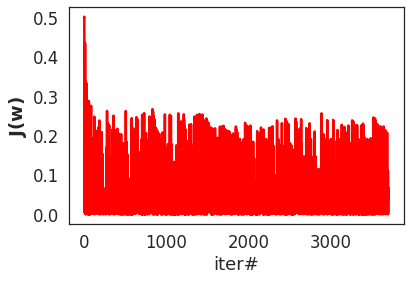

In [ ]:
lsc.sgd(x_train, y_train_trans, num_epochs=100,reg_rate=0)
plot_learning_curve(lsc.err_all)


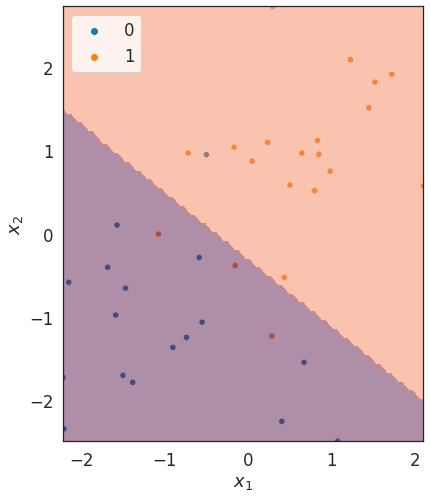

In [ ]:
visualize_model(x_train, y_train, lsc)

#Evaluation matrix 


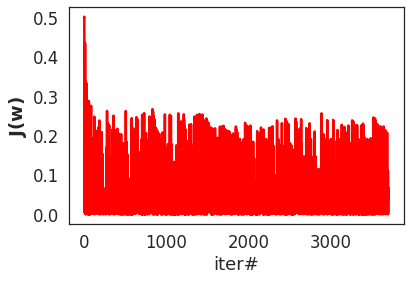

In [ ]:
'''import numpy as np

class_indices = np.array([1,0,1,2,7]) #using same example that mukesh used

np.eye(np.max(class_indices) + 1)[[1,0,1,2,7],]
np.eye(14)[[1,7],]
'''

plot_learning_curve(lsc.err_all)

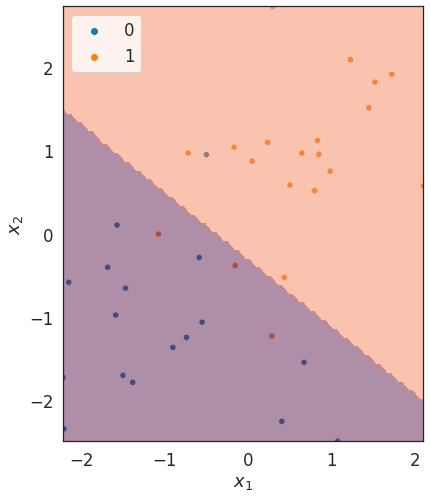

In [ ]:
visualize_model(x_train, y_train, lsc)

In [ ]:
lsc.gd(x_train, y_train_trans, num_epochs=100,reg_rate=0, lr=1e-3)

array([[ 0.41668279,  0.55806587],
       [-0.16731149,  0.15659043],
       [-0.19631357,  0.20211498]])

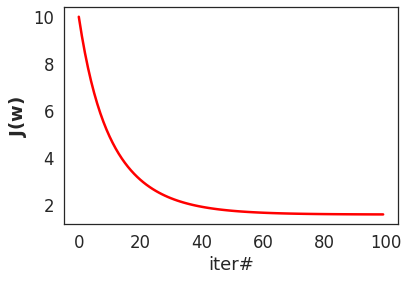

In [ ]:
plot_learning_curve(lsc.err_all)

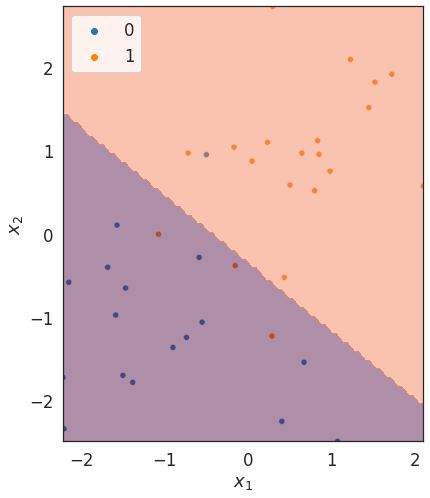

In [ ]:
visualize_model(x_train, y_train, lsc)

#Evaluation metrics 

In [ ]:
print(x_test.shape)

(13, 3)


In [ ]:
y_test_hat = lsc.predict(x_test)  #this predict function gives labels
print(y_test)
y_test_hat

[0 0 1 0 0 0 1 0 1 1 0 0 1]


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

Get counts of true positive and negatives, false positives and negatives.


In [ ]:
tp = np.where((y_test==1)&(y_test_hat == 1), 1, 0).sum()
tn = np.where((y_test==0)&(y_test_hat == 1), 0, 0).sum()
fp = np.where((y_test==0)&(y_test_hat == 1), 1, 0).sum()
fn = np.where((y_test==1)&(y_test_hat == 1), 0, 0).sum()

In [ ]:
def precision(tp, fp):
  if (tp+fp)==0: return NaN 
  return tp/(tp+fp) 

def recall(tp, fn):
  if (tp+fp)==0: return NaN 
  return tp/(tp+fn) 

def accuracy(tp, fp, tn, fn):
  return (tp+tn)/(tp + tn + fp + fn)

def f1_score(pr, r):
  return 2*pr*r/(pr+r)
  

#Classification metrics



In [ ]:
pr = precision (tp, fp )
r = recall (tp, fn) 
print("Precision:", pr)
print("Recall:", r)
print("Accuracy:", accuracy(tp,fp, tn,fn))
print("F1 score:", f1_score(pr,r)) 


Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1 score: 1.0


#Demo#2: Linearly separable binary classification with outliers. 
In the second demonstration, we show that the least square classifier is influenced by the presence of outliers in the dataset. 



In [ ]:
x_train, x_test, y_train, y_test , y_train_trans , y_test_trans = preprocess(add_outliers=True)





We add five outliers in one class and check what happens to the classification boundary.


In [ ]:
print("\nShape of training feature matrix:", x_train.shape)
print("Shape of label vector:", y_train.shape) 
print("\nShape of test feature matrix:", x_test.shape)
print("shape of test label vector:", y_test.shape)


Shape of training feature matrix: (41, 3)
Shape of label vector: (41,)

Shape of test feature matrix: (14, 3)
shape of test label vector: (14,)


Let's visualize the training set:



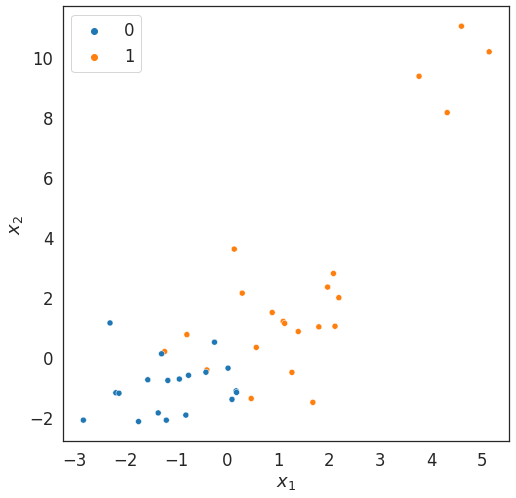

In [ ]:
sns.set_style("white") 
f = plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5}) 


sns.scatterplot(data=x_train, x=x_train[:,-2],y=x_train[:,-1], hue=y_train)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

The next step is to learn the LeastSquare classification model on this data and check if it is affected due to the presence of outliers.

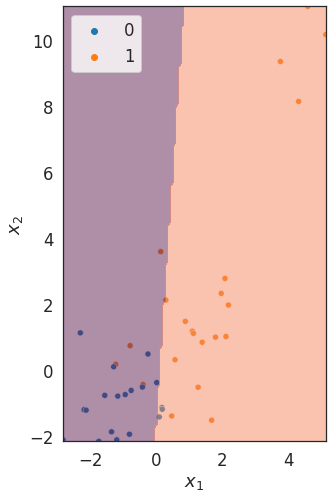

In [ ]:
lsc_outlier = LeastSquareClassification() 
lsc_outlier.fit(x_train, y_train_trans, reg_rate=0)
visualize_model(x_train, y_train, lsc_outlier)

Compare the decision boundary with the earlier one learnt without any outliers.

**Question**: Try iterative optimization methods on this set up and check the outcome. 

#Demo #3: Multi-class setup 
In this set up, we demonstrate multi-class set up with three classes:



In [ ]:
x_train, x_test ,y_train, y_test, y_train_trans, y_test_trans = preprocess(add_class=True) 


Let's visualize the training set:


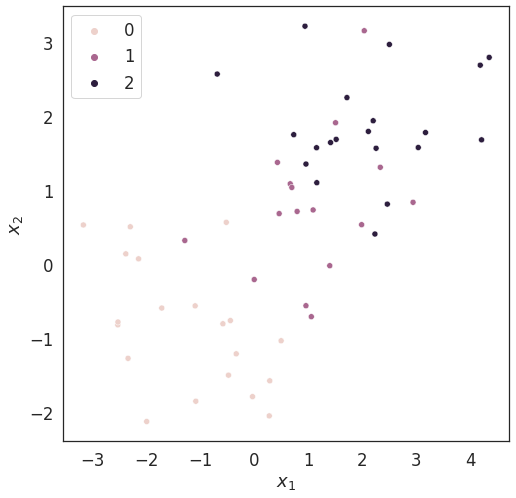

In [ ]:
sns.set_style("white") 
f = plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5}) 


sns.scatterplot(data=x_train, x=x_train[:,-2],y=x_train[:,-1], hue=y_train)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
np.unique(y_train)

array([0, 1, 2])

Now train the least square classifier and visualize the decision boundary.


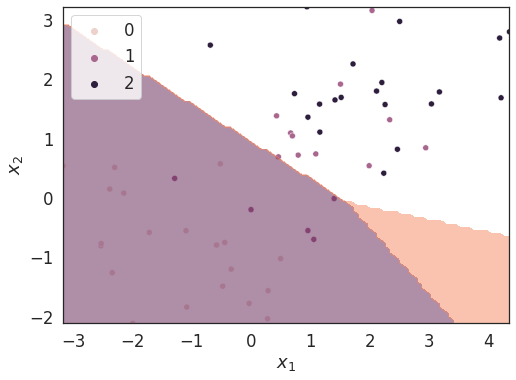

In [ ]:
lsc_multi_class = LeastSquareClassification()
lsc_multi_class.fit(x_train, y_train_trans, reg_rate=1)
visualize_model(x_train, y_train, lsc_multi_class)

In [ ]:
lsc_multi_class.w

array([[ 0.51257507,  0.25860312,  0.20819086],
       [-0.12224683,  0.04335805,  0.08015244],
       [-0.15530113, -0.00672301,  0.16611139]])

We will use `classification_report` for obtaining evaluationn metrics for multi-class classification. This can be implemented from scratch by first calculating multi-class confusion matrix followed by metric computations.

In [ ]:
from sklearn.metrics import classification_report 
y_test_pred = lsc_multi_class.predict(x_test)
print(classification_report(y_test,y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.11      0.20         9
           2       0.56      1.00      0.71         5

    accuracy                           0.58        19
   macro avg       0.70      0.70      0.54        19
weighted avg       0.77      0.58      0.47        19



#Demo# 4: Polynomial least square classification 

In this demonstration, we will generate points from two classes such that the decision boundary between them is circular (i.e. non-linear) 



In [ ]:
from sklearn.datasets import make_circles 
x , y = make_circles () 


We will first transform the feature set to obtain the polynomial features of degree 2 and then train least squre classification on the transformed feature set.


In [ ]:
x_poly =polynomial_transform(x, degree=2)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y)

In [ ]:
print("shape of feature matrix before transformation:", x.shape)
print("shape of feature matrix after polynomial transformation of degree 2", x_poly.shape)

shape of feature matrix before transformation: (100, 2)
shape of feature matrix after polynomial transformation of degree 2 (100, 6)


In [ ]:
x[:5]

array([[ 0.06279052,  0.99802673],
       [ 0.96858316,  0.24868989],
       [ 0.80901699,  0.58778525],
       [ 0.34062343,  0.72386164],
       [ 0.80901699, -0.58778525]])

In [ ]:
x_poly[:5]

array([[ 1.        ,  0.06279052,  0.99802673,  0.00394265,  0.06266662,
         0.99605735],
       [ 1.        ,  0.96858316,  0.24868989,  0.93815334,  0.24087684,
         0.06184666],
       [ 1.        ,  0.80901699,  0.58778525,  0.6545085 ,  0.47552826,
         0.3454915 ],
       [ 1.        ,  0.34062343,  0.72386164,  0.11602432,  0.24656424,
         0.52397568],
       [ 1.        ,  0.80901699, -0.58778525,  0.6545085 , -0.47552826,
         0.3454915 ]])

Let's visualize the training data: 


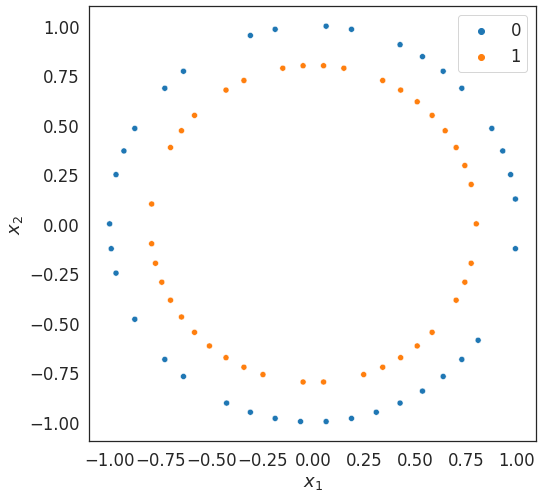

In [ ]:
sns.set_style('white') 
f = plt.figure(figsize=(8,8))
sns.set_context("notebook",font_scale=1.5 ,rc={"lines.linewidth": 2.5})

sns.scatterplot(data=x_train, x=x_train[:,1], y= x_train[:,2], hue=y_train)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
#@title Let's encode the  labels with   "LabelTransformer"

y_train_trans =LabelTransformer().encode(y_train)
y_test_trans =LabelTransformer().encode(y_test)

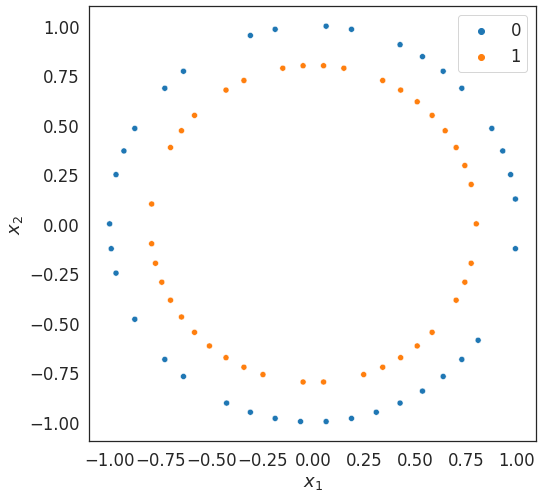

In [ ]:
#@title Let's visualize the training data:

sns.set_style("white")
f = plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2],hue = y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

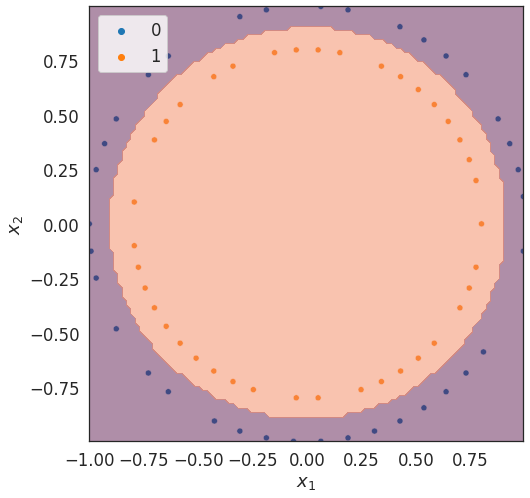

In [ ]:
#@title Build the least classification model and visualize the decision boundary.


lsc_poly = LeastSquareClassification() 
lsc_poly.fit(x_train, y_train_trans, reg_rate=1)
visualize_model(x_train, y_train, lsc_poly, degree=2)

Let's evaluate the performance of the classifier.


In [ ]:
from sklearn.metrics import classification_report 
y_test_pred = lsc_poly.predict(x_test)
print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



#**Perceptron**
In this colab, we will implement perceptron algorithm from scratch:

#Summary of perceptron components: 

#Training Data 
* Feature matrix: $\mathbf X_{n \times (m+1)} $ includes a dummy feature $x_0$ that is set to 1.
* Label vector: $\mathbf y_{n \times 1}$ 

> Note that perceptron can solve only **binary classification** problems.


#Model 


\begin{eqnarray} h_{\mathbf w} \colon y &=& \text{sign}(\mathbf w^T \phi(\mathbf x)) \\&=& \text {sign}(z)  \end{eqnarray}

where,
* $\mathbf w$ is a weight vector in $ {\Re}^{(m+1)} $
* \begin{equation}  \text {sign} (z)= \begin{cases} +1, \mbox { if $z$ $\ge$ 0}\\-1, \text {otherwise} (i.e. z < 0) \end{cases}  \end{equation} 


#Loss function 
\begin{eqnarray} J(\mathbf w) &=& {\sum}_{i=1}^{n}\\ &=& \sum_{i=1}^{n}\text {max} (-h_{\mathbf w}(\mathbf x^{(i)})y^{(i)},0) \end{eqnarray}


#Optimization procedure (Perceptron update rule) 
1. Initialize $\mathbf w^{(0)} =0$
2. For each training example $(\mathbf x^{(i)},y^{(i)})\colon $
    * $\hat y^{(i)}= \text{sign}(\mathbf w^T \phi(\mathbf x))$[Calculate the ouput value] 
    * $\mathbf w^{(t+1}:= \mathbf w^{(t)}+ \alpha (y^{(i)} -\hat y^{(i)}) \phi(\mathbf x^{(i)})$ [Update the weights] 

> Linear separable examples leads to convergence of the algorightm with zero training loss, else it oscillates. 

#Evaluation metrics 
* Confusion matrix 
* Precision/Recall/F1 

#Implementation 

Let's first import useful libraries for this implementation and visualization.



In [ ]:
np.random.seed(1234)
%matplotlib inline 


In [ ]:
#@title Perceptron Class

class Perceptron:
  """ Implements perceptron class.
  
  It uses the following class variables: 
  w: stores the final weight vector 
  w_all: stores all weight vector in training iterations.
  errors_all: stores all errors in training iterations.
  """ 

  def __init__(self):
    return 
  
  def predict(self,X):
    ''' Predicts labels for input feature matrix X.''' 

    z = X @ self.w 
    return np.where(z>=0 , 1, -1)
  

  def loss(self, X,y):
    ''' Calculation loss.

    Calculates loss due to current weight vector w on feature matrix X and label vector y:
    Args: 
        X: feature matrix 
        y: Label vector 

    Returns:
      None 

    ''' 
    return np.sum(np.maximum(-1*self.predict(X)*y, np.zeros(y.shape[0])))

  def train(self, X, y, epochs=10, lr = 0.001):
    ''' Implements perceptron update rule.

    Args: 
        X: feature matrix
        y = Label vector 
        epochs =Number of epochs
        lr = Learning rate

    Returns: 
        None
    '''
    self.w = np.zeros(X.shape[1])
    self.errors_all =[]
    self.w_all=[] 


    for _ in range(epochs):
      errors = 0 
      for xi, target in zip(X,y): 
        self.w+=lr*(target -self.predict(xi))*xi 
        errors += (max(-1*self.predict(xi)*target, 0)) 
      self.errors_all.append(errors)
      self.w_all.append(self.w) 
      print("w:", perceptron_obj.w) 
      print("J(w):", perceptron_obj.errors_all[-1]) 

      #Note: Commented for loss visualization. Uncomment in actual implementation.
      #if self.loss(X,y)==0:
       # break


#Demonstration

1. Linearly separable case



In [ ]:
def visualize_model(X_train, y_train, perceptron_obj, degree=1):

  f = plt.figure(figsize = (8,8)) 

  #compute xlim and ylim 
  x1_min = np.min(x_train[:,1]) 
  x1_max = np.max(x_train[:,1])
  x2_min = np.min(x_train[:,2])
  x2_max = np.max(x_train[:,2]) 

  x1_test ,x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100),np.linspace(x2_min, x2_max, 100)) 
  x_test = np.array([x1_test, x2_test]).reshape(2,-1).T 
  x_test_poly = polynomial_transform(x_test , degree = degree )
  y_test = perceptron_obj.predict(x_test_poly )

  sns.scatterplot(data=X_train, x=X_train[:,1], y =X_train[:,2],hue=y_train)
  plt.contourf(x1_test,x2_test, y_test.reshape(100,100),alpha=0.5,levels=np.linspace(0,1,3))

  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)
  plt.gca().set_aspect('equal', adjustable='box')
  return plt.show()


w: [3.         0.75563623 1.72544122]
J(w): 0
w: [4.         5.98810618 2.37815907]
J(w): 0
w: [3.         3.82188833 1.790647  ]
J(w): 0
w: [4.         4.81169531 2.00707135]
J(w): 0
w: [1.         4.31177339 1.44926763]
J(w): 0
w: [2.         4.78565244 1.39141034]
J(w): 0
w: [1.         2.61943458 0.80389828]
J(w): 0
w: [ 2.         -0.38511381  0.85163003]
J(w): 0
w: [1.         3.8297354  0.94523369]
J(w): 0
w: [0.         3.08806588 0.54426002]
J(w): 0


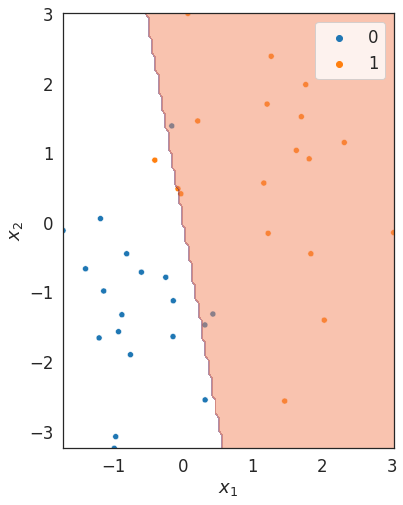

In [ ]:
from sklearn.model_selection import train_test_split
x ,y = create_toy_data() 
x_poly = polynomial_transform(x,degree=1)
x_train ,x_test, y_train, y_test = train_test_split(x_poly,y)



perceptron_obj = Perceptron() 
perceptron_obj.train(x_train, y_train, lr =1)
visualize_model(x_train, y_train, perceptron_obj, degree=1)

In [ ]:
perceptron_obj.errors_all

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Text(0.5, 1.0, 'Learning Curve')

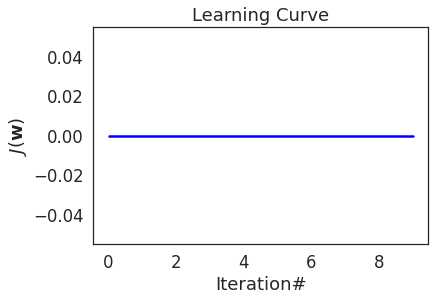

In [ ]:
plt.plot(np.arange(len(perceptron_obj.errors_all)), perceptron_obj.errors_all,'b-')
plt.xlabel('Iteration#')
plt.ylabel('$J(\mathbf{w})$')
plt.title("Learning Curve")

#Linearly non-separable case



In [ ]:
x ,y = create_toy_data() #create_toy_data(factor=0.5) WILL HAVE TO KNOW MEANING OF FACTOR FIRST
x_poly = polynomial_transform(x, degree=1)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y)

perceptron_obj=Perceptron() 
perceptron_obj.train(x_train, y_train, lr =1)

w: [ 2.         -1.38662605  3.69823289]
J(w): 0
w: [ 2.         -1.25497818  3.40695995]
J(w): 0
w: [ 2.         -1.12333031  3.11568702]
J(w): 0
w: [ 2.         -0.97886232  2.89061061]
J(w): 0
w: [ 2.         -0.83439432  2.6655342 ]
J(w): 0
w: [ 2.         -0.68992633  2.44045779]
J(w): 0
w: [2.         3.00748884 3.23647681]
J(w): 0
w: [ 2.         -1.30787963  3.79121969]
J(w): 0
w: [ 2.         -1.17623176  3.49994676]
J(w): 0
w: [ 2.         -1.04458389  3.20867382]
J(w): 0


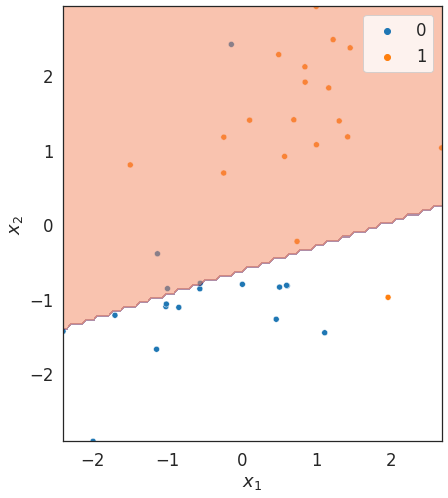

In [ ]:
visualize_model(x_train, y_train, perceptron_obj, degree=1)

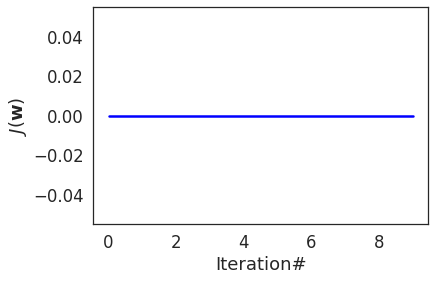

In [ ]:
plt.plot(np.arange(len(perceptron_obj.errors_all)), perceptron_obj.errors_all, 'b-')
plt.xlabel('Iteration#')
plt.ylabel("$J (\mathbf {w})$")
plt.show()